In [1]:
# read the .npy file


import numpy as np
import os


file = 'frames.npy'

frames = np.load(file)  


print(frames.shape)

(11, 1, 784, 3)


In [2]:
j# squeeze the frames

frames = np.squeeze(frames)

print(frames.shape)

(11, 784, 3)


In [3]:
#apply sigmoid function to the frames
import torch 

frames = torch.tensor(frames)


print(frames.shape)
print(frames)

torch.Size([11, 784, 3])
tensor([[[  61.4426,   13.7962,   76.7893],
         [  -2.8276,  -13.6543,  -14.9764],
         [-109.9035,   -2.3762,  -70.9709],
         ...,
         [ -58.4351,  105.9026,   50.8918],
         [-116.4021,   27.3799,    8.3773],
         [ -44.6780,   -3.0315,   61.6792]],

        [[ -55.6645,   25.2281,   36.4224],
         [  28.2901,   54.1849,  -58.7771],
         [  -7.0679,  -41.1034,  -98.0227],
         ...,
         [  37.0831,  -65.4834,   36.1280],
         [  39.7998,  -28.5748,  -34.4956],
         [ -12.5259,  -21.5766,  -73.2864]],

        [[ -62.5627,   23.0921,  -85.8193],
         [ -38.7512,   12.6548,  -11.3370],
         [   4.2222,   55.3891,   66.0771],
         ...,
         [  54.8946,   -8.0248,   23.9407],
         [   6.5436,   25.6995,   15.8483],
         [  35.6410,   -7.0743,  -38.9426]],

        ...,

        [[  36.8350,  -24.9880,  -45.7720],
         [ -41.9546,   27.0246,  -52.5070],
         [ -38.3101,  -16.2832,  

In [7]:
#get the first frame

frame = frames[-1]

print(frame)

tensor([[  6.6326, -19.6307,  13.7395],
        [108.1456,  12.3977,  13.9074],
        [-18.4652,  21.0519,  69.0299],
        ...,
        [ 38.3350, -15.6591, -35.2533],
        [ 53.9691, -59.5440,  13.9884],
        [ 46.0480, -35.9102, -74.2338]])


In [8]:
frames_to_plot = frame[:,:2 ]
print(frames_to_plot.shape)

torch.Size([784, 2])


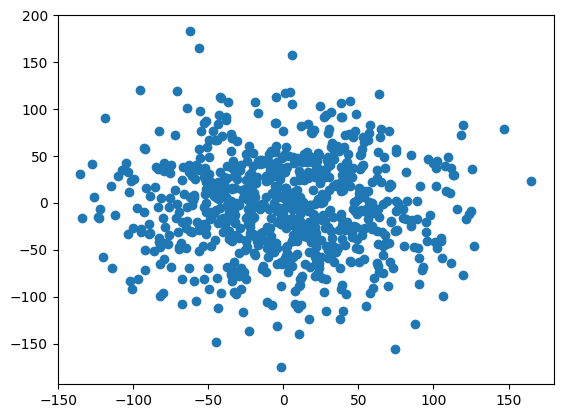

In [9]:
frames_to_plot = frames_to_plot
import matplotlib.pyplot as plt
plt.scatter(frames_to_plot[:,0], frames_to_plot[:,1])
plt.show()


In [10]:
print(torch.randn(3, 3))  

tensor([[-0.5186, -0.0450,  0.3529],
        [-1.5010, -1.2193, -0.4258],
        [ 0.3040,  1.0978,  0.5716]])
